### Goal is high recall
- False positive - an app is going to be highly rated and it isn’t 
    - Investing in the wrong thing that has less change of being successful
- False negative - an app is predicted not highly rated and it actually would be
    - Would lose out on bringing app to world
    
Want to be better at weeding out False Negatives aka be best at True Positives. This is Recall.

In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import data
data = pd.read_csv('../data/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# create data copy for manipulation
df = data.copy()

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Rating is target so, dropna
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [8]:
# What % of Ratings are >= 4.5
# 4.5 out of 5 is high rating on Google Play Store
len(df[df['Rating'] >= 4.5])/len(df)

0.3155982905982906

In [9]:
# Create target Positive Rating
df['Pos Rating'] = 0

for row in df['Rating'].index:
    if df['Rating'][row] >= 4.5:
        df['Pos Rating'][row] = 1

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Check work, target created
df['Pos Rating'].value_counts(normalize=True)

0    0.684402
1    0.315598
Name: Pos Rating, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Pos Rating        9360 non-null int64
dtypes: float64(1), int64(1), object(12)
memory usage: 1.4+ MB


In [12]:
df['Type'].value_counts(normalize=True)

Free    0.93109
Paid    0.06891
Name: Type, dtype: float64

In [13]:
# Conversions

# Convert to Reviews to numeric, integer
df['Reviews'] = df['Reviews'].astype(int)

# Drop Price column, use Type - 93% are Free or 0 in Price.
df = df.drop(columns='Price', axis=1)

# Drop Rating, duplicative of Pos Rating and is target
df = df.drop(columns='Rating', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 12 columns):
App               9360 non-null object
Category          9360 non-null object
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Pos Rating        9360 non-null int64
dtypes: int64(2), object(10)
memory usage: 1.2+ MB


In [15]:
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

,App,Category,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9360,9360,9360,9360,9360,9360,9360,9360,9360,9360
unique,8190,33,413,19,2,6,115,1299,2638,31
top,ROBLOX,FAMILY,Varies with device,"1,000,000+",Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1746,1637,1576,8715,7414,732,319,1415,2059


In [16]:
# App - drop, equivalent of ID
# Categorry - 33 uniques, OHE
# Size - 413 unique values, most common is Varies with device/in M and k
# will need to convert to same unites
# Installs - can keep as categories and OHE or try numeric
# Content Rating - categorical, but could be ordinal
# Genres - categorical, can OHE; see if there is an opportunity to bucket smaller genres into
# larger ones
# Last Updated - leave out as do not have specific stats for age feature
# Current Version and Android Version are not controllable features

In [17]:
df.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Pos Rating'],
      dtype='object')

In [18]:
X = df.drop(columns=['Pos Rating', 'App', 'Last Updated', 'Current Ver', 'Android Ver'])
y = df['Pos Rating']

In [19]:
X.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating',
       'Genres'],
      dtype='object')

In [20]:
# Separate for different treatments (scaling and OHE)

num_cols = ['Reviews']

ohe_cols = ['Category', 'Size', 'Installs', 'Type', 'Content Rating', 'Genres']

## Numeric Treatment - Scale

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaled_features = df.copy()

In [23]:
features = scaled_features[num_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [24]:
scaled_features[num_cols] = features
scaled = scaled_features[['Reviews', ]]

In [25]:
scaled.head()

,Reviews
0,-0.163511
1,-0.163254
2,-0.135735
3,-0.094991
4,-0.163254


## Categorical Treatment (OHE)

In [26]:
ohe_features = df.copy()

In [27]:
ohe_features = ohe_features[ohe_cols]

In [28]:
ohe_features = pd.get_dummies(ohe_features)

In [29]:
ohe_features

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Combine - Data Version 1 - Many OHE, First Shitty Model

In [30]:
# Combine scaled numerical, OHE categoricals, and target into one df
preprocessed = pd.concat([scaled, ohe_features, y], axis=1)

In [31]:
preprocessed.columns

Index(['Reviews', 'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION',
       ...
       'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Pos Rating'],
      dtype='object', length=590)

## First Shitty Model

In [32]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix

In [33]:
# X and y split of preprocessed 
X = preprocessed.drop(columns=['Pos Rating'], axis=1)
y = preprocessed['Pos Rating']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
# Instantiate
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Preds
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Scores
------------
Accuracy: 0.715954415954416
Recall: 0.2648888888888889
F1 Score: 0.37413684871311986
--------------------
Test Scores
-----------
Accuracy: 0.7128205128205128
Recall: 0.22585227272727273


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

Recall Mean Cross Val 3-Fold: 0.23555555555555555
F1 Score: 0.3212121212121212


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


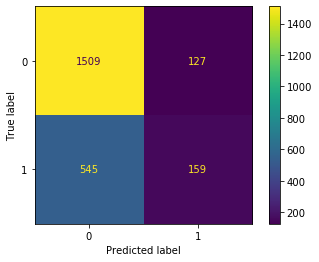

In [36]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(logreg, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(logreg, X_test, y_test, values_format='')
plt.show()

# Overfit
# Accuracy only 3% better than random guess (68% from Pos Rating split)
# Low recall, higher precision (.22 recall versus .32 f1)

### Try with Class Balance parameter

In [37]:
# Instantiate; adding class weight balanced since 70/30 split of target
logreg2 = LogisticRegression(class_weight='balanced')

# Fit
logreg2.fit(X_train, y_train)

# Preds
train_preds = logreg2.predict(X_train)
test_preds = logreg2.predict(X_test)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Scores
------------
Accuracy: 0.6777777777777778
Recall: 0.644
F1 Score: 0.5616279069767441
--------------------
Test Scores
-----------
Accuracy: 0.6376068376068376
Recall: 0.5880681818181818


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Recall Mean Cross Val 3-Fold: 0.5755555555555556
F1 Score: 0.4940334128878281


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


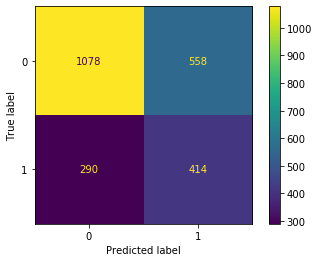

In [38]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(logreg2,  X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(logreg2, X_test, y_test, values_format='')
plt.show()

# Overfit
# Accuracy decreases .8
# Much higher recall from 0.22 to 0.58
# Can also see precision is lower as F1 is 0.49 (mean of precision and accuracy scores)

## Try Decision Tree

In [39]:
# X and y split of preprocessed 
X = preprocessed.drop(columns=['Pos Rating'], axis=1)
y = preprocessed['Pos Rating']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
# Instantiate
dt = DecisionTreeClassifier(class_weight='balanced')

# Fit
dt.fit(X_train, y_train)

# Preds
train_preds = dt.predict(X_train)
test_preds = dt.predict(X_test)

Train Scores
------------
Accuracy: 0.9998575498575498
Recall: 1.0
F1 Score: 0.9997778271495222
--------------------
Test Scores
-----------
Accuracy: 0.7243589743589743
Recall: 0.5696022727272727
Recall Mean Cross Val 3-Fold: 0.5604444444444444
F1 Score: 0.5542501727712509


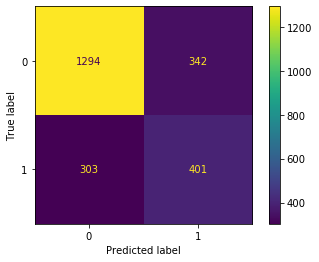

In [42]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt, X_test, y_test, values_format='')
plt.show()

# Overfit
# Better accuracy than balance logreg
# Similar recall to balanced logreg
# Higher f1 which also means higher precision

In [43]:
# Look at feature importances
import operator

coef = dt.feature_importances_ # Pull feature impotances from dt model above
d = dict(zip(X.columns, coef)) # Zip them in dictionary
sorted_dict = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True)) # Sort dictionary based on descending importance
sorted_dict

# Reviews are big driver
# Events apps or Casual apps are next up, but far from Reviews

{'Reviews': 0.2718240921903429,
 'Size_Varies with device': 0.018879829954745637,
 'Installs_1,000,000+': 0.01849975509509079,
 'Installs_1,000+': 0.011188098653345992,
 'Type_Free': 0.011102324667370714,
 'Category_FAMILY': 0.010892234749925608,
 'Content Rating_Everyone': 0.010388168816934497,
 'Category_HEALTH_AND_FITNESS': 0.009102517440016028,
 'Installs_500,000+': 0.008734298728790935,
 'Installs_5,000+': 0.00872250538692338,
 'Size_13M': 0.008262743962735738,
 'Installs_10,000+': 0.00793565165501577,
 'Content Rating_Mature 17+': 0.007825098164363851,
 'Installs_10,000,000+': 0.007492373051245696,
 'Genres_Entertainment': 0.007473789107678263,
 'Category_SPORTS': 0.007436642958174878,
 'Installs_100,000+': 0.00697707864933005,
 'Genres_Tools': 0.006930351476280408,
 'Content Rating_Teen': 0.006868065774289943,
 'Genres_Action': 0.006824321717676513,
 'Category_GAME': 0.006552472658047225,
 'Size_18M': 0.006406971919528597,
 'Installs_500+': 0.006406162325914066,
 'Installs_5,000

## Try KNN

In [44]:
# X and y split of preprocessed 
X = preprocessed.drop(columns=['Pos Rating'], axis=1)
y = preprocessed['Pos Rating']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# Instantiate
knn = KNeighborsClassifier()

# Fit
knn.fit(X_train, y_train)

# Preds
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_test)

Train Scores
------------
Accuracy: 0.8032763532763533
Recall: 0.5631111111111111
F1 Score: 0.6472541507024266
--------------------
Test Scores
-----------
Accuracy: 0.7175213675213675
Recall: 0.3806818181818182
Recall Mean Cross Val 3-Fold: 0.3831111111111111
F1 Score: 0.4477861319966583


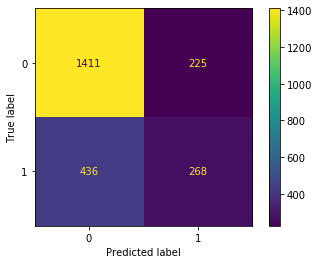

In [47]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(knn, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(knn, X_test, y_test, values_format='')
plt.show()

# Overfit
# Similar accuracy to logreg and decision tree
# Recall and F1 suffers. Stick with decision tree since going for recall

## Try Random Forest

In [48]:
# X and y split of preprocessed 
X = preprocessed.drop(columns=['Pos Rating'], axis=1)
y = preprocessed['Pos Rating']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
# Instantiate
rf = DecisionTreeClassifier(class_weight='balanced')

# Fit
rf.fit(X_train, y_train)

# Preds
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

Train Scores
------------
Accuracy: 0.9998575498575498
Recall: 1.0
F1 Score: 0.9997778271495222
--------------------
Test Scores
-----------
Accuracy: 0.7235042735042735
Recall: 0.5710227272727273
Recall Mean Cross Val 3-Fold: 0.5582222222222223
F1 Score: 0.5541006202618883


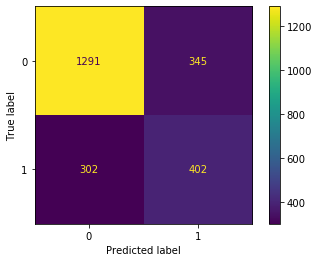

In [51]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(rf, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(rf, X_test, y_test, values_format='')
plt.show()

# Overfit, but can tune
# Better accuracy similar to decision tree
# Recall is also similar
# Slightly lower f1 score

## Too Many OHE Columns in Baseline Dataset to Appropriately measure - Data Cleansing Round 2 then try again

Get to 
- Numeric = ['Reviews', 'Size Trans']
- Ordinal = ['Installs']
- OHE = ['Category', 'Type', 'Content Rating', 'Genres']

#### Make installs Ordinal

In [52]:
# Make Installs ordinal instead of categorical
df['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [53]:
# Combine those less than 500 and relabel
df['Installs'] = df['Installs'].replace(['1+', '5+', '10+', '50+', '100+', ], 'Less than 500')

In [54]:
# Check work
df['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
Less than 500      446
5,000+             431
100,000,000+       409
50,000,000+        289
500+               201
500,000,000+        72
1,000,000,000+      58
Name: Installs, dtype: int64

In [55]:
# Ordinal mapping
df['Installs'] = df['Installs'].replace(['1+', '5+', '10+', '50+', '100+'], 'Less than 500')

In [56]:
# Check work
df['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
Less than 500      446
5,000+             431
100,000,000+       409
50,000,000+        289
500+               201
500,000,000+        72
1,000,000,000+      58
Name: Installs, dtype: int64

In [57]:
# Map ordinal values
df['Installs'] = df['Installs'].map({'Less than 500': 0,
                                    '500+': 1,
                                    '1,000+': 2,
                                    '5,000+': 3,
                                    '10,000+': 4,
                                    '50,000+': 5,
                                    '100,000+': 6,
                                    '500,000+': 7,
                                    '1,000,000+': 8,
                                    '5,000,000+': 9,
                                    '10,000,000+': 10,
                                    '50,000,000+': 11,
                                    '100,000,000+': 12,
                                    '500,000,000+': 13,
                                    '1,000,000,000+': 14})

In [58]:
# Check results; matches counts table above
df['Installs'].value_counts()

8     1576
10    1252
6     1150
4     1009
9      752
2      712
7      537
5      466
0      446
3      431
12     409
11     289
1      201
13      72
14      58
Name: Installs, dtype: int64

#### Genre clean

In [59]:
# Preview Genres values
df['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10834                    Education
10836                    Education
10837                    Education
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 9360, dtype: object

In [60]:
# Some have multiple values, create lists
df['Genres'] = df['Genres'].str.split(';')

In [61]:
# View multi-genre value
df['Genres'][1]

['Art & Design', 'Pretend Play']

In [62]:
# Test references for for loop 
len(df['Genres'][1])

2

In [63]:
# Test references for for loop 
df['Genres'][1][0]

'Art & Design'

In [64]:
# Some apps have multiple Genres - take first listed genre as priority
for row in df['Genres'].index:
    df['Genres'][row] = df['Genres'][row][0]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
# Check work - can see all strings and all first Genres
df['Genres']

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10834            Education
10836            Education
10837            Education
10839    Books & Reference
10840            Lifestyle
Name: Genres, Length: 9360, dtype: object

In [66]:
df['Genres'].value_counts()
# There are many Genres under 100, to help prevent overfitting - rebucket those under 100

Tools                      733
Entertainment              577
Education                  563
Action                     375
Productivity               351
Medical                    350
Sports                     337
Communication              329
Finance                    323
Photography                317
Lifestyle                  315
Personalization            312
Business                   303
Health & Fitness           299
Casual                     262
Social                     259
Shopping                   238
News & Magazines           233
Travel & Local             226
Arcade                     223
Simulation                 212
Dating                     195
Books & Reference          180
Video Players & Editors    163
Puzzle                     147
Maps & Navigation          124
Role Playing               119
Racing                     114
Food & Drink               109
Strategy                   107
Educational                103
Adventure                   89
House & 

In [67]:
df[df['Category'] =='EVENTS']['Genres'].value_counts()

Events    45
Name: Genres, dtype: int64

In [68]:
df[df['Genres'] == 'Lifestyle']

,App,Category,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Pos Rating
1562,Dollhouse Decorating Games,LIFESTYLE,18968,32M,9,Free,Teen,Lifestyle,"April 26, 2018",5.1,4.1 and up,0
1563,metroZONE,LIFESTYLE,47497,34M,10,Free,Everyone,Lifestyle,"June 8, 2018",5.3.0.54.7,5.0 and up,0
1564,Easy Hair Style Design,LIFESTYLE,601,5.1M,6,Free,Everyone,Lifestyle,"December 20, 2017",1.0,2.3 and up,0
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,140995,100M,10,Free,Everyone,Lifestyle,"July 16, 2018",9.0,4.0 and up,0
1566,"Black Wallpaper, AMOLED, Dark Background: Darkify",LIFESTYLE,51357,80M,9,Free,Everyone,Lifestyle,"July 31, 2018",8.0,4.0 and up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10719,Sona - Nær við allastaðni,LIFESTYLE,31,25M,2,Free,Everyone,Lifestyle,"August 2, 2018",1.6.3,4.4 and up,0
10742,GKPB FP Online Church,LIFESTYLE,32,7.9M,2,Free,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up,1
10797,Fuel Rewards® program,LIFESTYLE,32433,46M,8,Free,Everyone,Lifestyle,"June 26, 2018",2.9.1,5.0 and up,1
10805,Scoreboard FR,LIFESTYLE,3,15M,0,Free,Everyone,Lifestyle,"August 7, 2018",2.1,4.2 and up,0


#### Genre Bucketing

In [69]:
# Genre buckets to reassign
# Adventure                   Action
# House & Home                Lifestyle
# Weather                     Travel & Local 
# Auto & Vehicles             Lifestyle
# Art & Design                Lifestyle
# Libraries & Demo            Entertainment
# Board                       Casual - games
# Comics                      Entertainment
# Parenting                   Lifestyle
# Card                        Casual - games
# Events                      Lifestyle
# Beauty                      Lifestyle
# Casino                      Casual - games
# Word                        Casual - games
# Trivia                      Casual - games
# Music                       Entertainment
# Music & Audio               Entertainment

In [70]:
# Code for mappings above

# Replace with Action
df['Genres'] = df['Genres'].replace(['Adventure'], 'Action')

# Replace with Travel & Local
df['Genres'] = df['Genres'].replace(['Weather'], 'Travel & Local')

# Replace with Lifestyle
df['Genres'] = df['Genres'].replace(['House & Home', 'Auto & Vehicles', 'Art & Design', 'Events', 'Beauty', 'Parenting'], 
                                    'Lifestyle')
# Replace with Entertainment
df['Genres'] = df['Genres'].replace(['Libraries & Demo', 'Comics', 'Music', 'Music & Audio'], 'Entertainment')

# Replace with Casual
df['Genres'] = df['Genres'].replace(['Board', 'Card', 'Casino', 'Word', 'Trivia'], 'Casual')

In [71]:
# Check work 
df['Genres'].value_counts()
# no values under 100

Tools                      733
Entertainment              724
Lifestyle                  665
Education                  563
Action                     464
Casual                     463
Productivity               351
Medical                    350
Sports                     337
Communication              329
Finance                    323
Photography                317
Personalization            312
Business                   303
Travel & Local             301
Health & Fitness           299
Social                     259
Shopping                   238
News & Magazines           233
Arcade                     223
Simulation                 212
Dating                     195
Books & Reference          180
Video Players & Editors    163
Puzzle                     147
Maps & Navigation          124
Role Playing               119
Racing                     114
Food & Drink               109
Strategy                   107
Educational                103
Name: Genres, dtype: int64

#### Size Translation

In [72]:
# Preview values
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [73]:
# Test references to pull out last character for measurement
df['Size'][0][-1]

'M'

In [74]:
# Create new column for Size Type - this will be M (for MB) or k (for kb) for those that do not have 
# value 'Varies with device'
df['Size Type'] = 0

# For each value in Size, take the last character and put it in Size Type
for row in df['Size'].index:
    df['Size Type'][row] = df['Size'][row][-1]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [75]:
# Check work; Varies with device 1637
df['Size Type'].value_counts()

M    7466
e    1637
k     257
Name: Size Type, dtype: int64

In [76]:
# Test reference 
df['Size'][0][:-1]

'19'

In [77]:
# Remove last character from Size, convert to numeric for math in Size Trans
for row in df['Size'].index:
    df['Size'][row] = df['Size'][row][:-1]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
# Test type conversion for math 
int(df['Size'][0])*1000

19000

In [79]:
# Create Size Translation column and convert Size in MBs to kbs
df['Size Trans'] = 0

# For each row in Size, check Size Type. If M (for MB) multiply by 1000 to convert to kb, 
# otherwise k values stay the same and e for varies by devices stay at zero (will fill nulls)
for row in df['Size'].index:
    if df['Size Type'][row] == 'e':
        continue
    if df['Size Type'][row] == 'M':
        df['Size Trans'][row] = float(df['Size'][row]) * 1000
    if df['Size Type'][row] == 'k':
        df['Size Trans'][row] = df['Size'][row]

# Convert column to float
df['Size Trans'] = df['Size Trans'].astype(float)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [80]:
# Look at the Size Translations for those that did not have "Varies by device" value aka Size Trans != 0
df[df['Size Trans'] != 0]['Size Trans'].describe()
# mean is nearly 1.5x median, so there are outliers

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size Trans, dtype: float64

In [81]:
# Name variable for Size median for filling nulls
size_median = df[df['Size Trans'] != 0]['Size Trans'].median()

In [82]:
# Fill Size Trans nulls with median
df['Size Trans'].fillna(size_median)

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        0.0
10840    19000.0
Name: Size Trans, Length: 9360, dtype: float64

In [83]:
# Review table with changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null int64
Type              9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Pos Rating        9360 non-null int64
Size Type         9360 non-null object
Size Trans        9360 non-null float64
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [84]:
# Drop helper columns for final value to be used in model Size Trans
df = df.drop(columns=['Size Type', 'Size'], axis=1)

In [85]:
# Review new table
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 12 columns):
App               9360 non-null object
Category          9360 non-null object
Reviews           9360 non-null int64
Installs          9360 non-null int64
Type              9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Pos Rating        9360 non-null int64
Size Trans        9360 non-null float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.2+ MB


## Additional Modeling

### Create new df for modeling

In [86]:
# New breakdown of column types for varying treatments before modeling
# Numerical columns
num_cols2 = ['Reviews', 'Size Trans']

# Ordinal columns
ord_cols = ['Installs']

# Categorical columns for OHE
ohe_cols = ['Category', 'Type', 'Content Rating', 'Genres']

#### Ordinal Features

In [87]:
ordinal = df['Installs']

#### Numeric Treatment - Scale

In [88]:
scaled_features2 = df.copy()

In [89]:
features2 = scaled_features2[num_cols2]
scaler = StandardScaler().fit(features2.values)
features2 = scaler.transform(features2.values)

In [90]:
scaled_features2[num_cols2] = features2
scaled2 = scaled_features2[['Reviews', 'Size Trans']]

In [91]:
scaled2.head()

,Reviews,Size Trans
0,-0.163511,0.002038
1,-0.163254,-0.215189
2,-0.135735,-0.445451
3,-0.094991,0.262712
4,-0.163254,-0.701779


#### Categorical Treatment (OHE)

In [92]:
ohe_features2 = df.copy()

In [93]:
ohe_features2 = ohe_features2[ohe_cols]

In [94]:
ohe_features2 = pd.get_dummies(ohe_features2)

In [95]:
ohe_features2

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Genres_Racing,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Combine - Data Version 2
- Numeric = ['Reviews', 'Size Trans']
- Ordinal = ['Installs']
- OHE = ['Category', 'Type', 'Content Rating', 'Genres']

In [96]:
# Combine scaled numerical, OHE categoricals, and target into one df
preprocessed2 = pd.concat([scaled2, ordinal, ohe_features2, y], axis=1)

In [97]:
preprocessed2.columns

Index(['Reviews', 'Size Trans', 'Installs', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
       'Content Rating_Adults only 18+', 'Content R

### Retry LogReg Balanced

In [98]:
# X and y split of preprocessed 
X = preprocessed2.drop(columns=['Pos Rating'], axis=1)
y = preprocessed2['Pos Rating']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
# Instantiate; adding class weight balanced since 70/30 split of target
logreg3 = LogisticRegression(class_weight='balanced')

# Fit
logreg3.fit(X_train, y_train)

# Preds
train_preds = logreg3.predict(X_train)
test_preds = logreg3.predict(X_test)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

Train Scores
------------
Accuracy: 0.6102564102564103
Recall: 0.5844444444444444
F1 Score: 0.49012299664554604
--------------------
Test Scores
-----------
Accuracy: 0.6068376068376068
Recall: 0.5710227272727273


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Recall Mean Cross Val 3-Fold: 0.5777777777777778
F1 Score: 0.46635730858468677


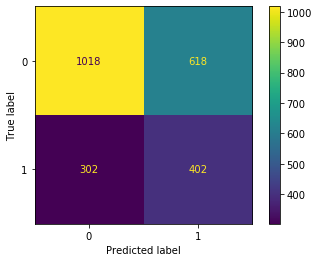

In [101]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(logreg3,  X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(logreg3, X_test, y_test, values_format='')
plt.show()

# Not as overfit as others
# Accuracy down .3 after data cleansing, less OHE so can't overlearn
# Recall similar
# F1 down 0.03 from original data

### Retry Decision Tree since that best performed (even though overfit, can tune)

In [102]:
# Instantiate
dt2 = DecisionTreeClassifier(class_weight='balanced')

# Fit
dt2.fit(X_train, y_train)

# Preds
train_preds = dt2.predict(X_train)
test_preds = dt2.predict(X_test)

Train Scores
------------
Accuracy: 0.9997150997150998
Recall: 1.0
F1 Score: 0.9995557529986673
--------------------
Test Scores
-----------
Accuracy: 0.7170940170940171
Recall: 0.5894886363636364
Recall Mean Cross Val 3-Fold: 0.5346666666666666
F1 Score: 0.5563002680965147


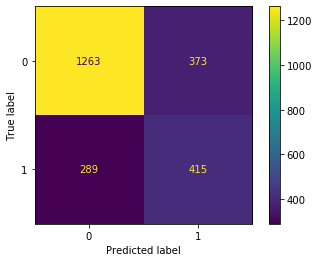

In [103]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt2, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt2, X_test, y_test, values_format='')
plt.show()

# Overfit, but can tune
# Better accuracy than balance logreg retry, similar to original decision tree
# Recall at highest at 0.58, validation lower at 0.53
# Similar f1 to original decision tree

In [104]:
# What is current depth of overfit tree
dt2.tree_.max_depth

53

In [105]:
coef = dt2.feature_importances_

In [106]:
d = dict(zip(X.columns, coef))

In [107]:
sorted_dict = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [108]:
sorted_dict
# Reviews, Size, and Installs are big drivers

{'Reviews': 0.3391771967966881,
 'Size Trans': 0.21201840651291906,
 'Installs': 0.09386812507891114,
 'Content Rating_Teen': 0.013297867013854103,
 'Content Rating_Everyone': 0.012309120591747042,
 'Genres_Entertainment': 0.011990519660550737,
 'Genres_Casual': 0.011075219690279192,
 'Genres_Action': 0.010589493090481258,
 'Type_Free': 0.010494882683427296,
 'Category_COMMUNICATION': 0.009864587897227715,
 'Content Rating_Mature 17+': 0.009623442512296958,
 'Category_FAMILY': 0.009546166676385635,
 'Category_GAME': 0.009104200487857487,
 'Genres_Education': 0.009062839986632251,
 'Category_LIFESTYLE': 0.008948891564027795,
 'Genres_Personalization': 0.008451288815666234,
 'Genres_Health & Fitness': 0.008036433846060615,
 'Category_TRAVEL_AND_LOCAL': 0.00682438105557626,
 'Genres_Travel & Local': 0.006570522887577386,
 'Genres_Tools': 0.006371089113172875,
 'Category_MEDICAL': 0.006366097166109968,
 'Content Rating_Everyone 10+': 0.006335780545573388,
 'Genres_Simulation': 0.0061006052

#### Try Decision Tree again with half depth to see impacts

In [109]:
# Instantiate
dt3 = DecisionTreeClassifier(class_weight='balanced', max_depth=26)

# Fit
dt3.fit(X_train, y_train)

# Preds
train_preds = dt3.predict(X_train)
test_preds = dt3.predict(X_test)

Train Scores
------------
Accuracy: 0.9615384615384616
Recall: 0.9595555555555556
F1 Score: 0.9411508282476024
--------------------
Test Scores
-----------
Accuracy: 0.7136752136752137
Recall: 0.5923295454545454
Recall Mean Cross Val 3-Fold: 0.5391111111111111
F1 Score: 0.5545212765957447


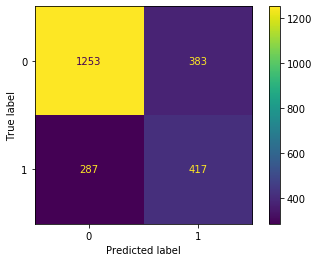

In [110]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt3, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt3, X_test, y_test, values_format='')
plt.show()

# Less overfit but still needs help - in GridSearch, do range around this, aim for lower
# number as this is still very overfit
# Similar recall and validation
# Same F1 as with full depth

### Tune Decision Tree

#### Grid Search

In [111]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30, 35],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

In [114]:
# grid = GridSearchCV(dt3,
#                    param_grid = param_dict,
#                    cv=5,
#                    verbose=1)

# grid.fit(X_train, y_train)

In [115]:
# grid.best_params_

In [116]:
# grid.best_score_

#### Apply GridSearch results to Decision Tree with Installs

In [117]:
# Instantiate
dt_grid = DecisionTreeClassifier(class_weight='balanced',
                             criterion = 'entropy',
                             max_depth = 10,
                             min_samples_leaf  = 20,
                             min_samples_split = 2)

# Fit
dt_grid.fit(X_train, y_train)

# Preds
train_preds = dt_grid.predict(X_train)
test_preds = dt_grid.predict(X_test)

Train Scores
------------
Accuracy: 0.7215099715099715
Recall: 0.5542222222222222
F1 Score: 0.5605754102045403
--------------------
Test Scores
-----------
Accuracy: 0.6863247863247863
Recall: 0.4928977272727273
Recall Mean Cross Val 3-Fold: 0.5306666666666667
F1 Score: 0.48599439775910364


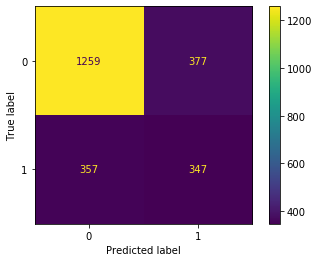

In [118]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt_grid, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt_grid, X_test, y_test, values_format='')
plt.show()

# Much less overfit - but accuracy down .2 - Same as random guess
# Recall much lower from 0.58 to 0.49 - but validation at 0.53

In [119]:
coef = dt_grid.feature_importances_

In [120]:
d = dict(zip(X.columns, coef))

In [121]:
sorted_dict = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [122]:
sorted_dict
# Reviews, Size, and Installs are big drivers
# Then Content Rating

{'Reviews': 0.35377055939426005,
 'Installs': 0.28773083995693227,
 'Size Trans': 0.11177972382370507,
 'Type_Free': 0.06210623032449733,
 'Genres_Health & Fitness': 0.041366887859316616,
 'Category_TRAVEL_AND_LOCAL': 0.02511964877855545,
 'Genres_Tools': 0.018035994694523463,
 'Content Rating_Mature 17+': 0.012834447740698807,
 'Genres_Education': 0.010817548183715288,
 'Category_SOCIAL': 0.010240877815036348,
 'Genres_Communication': 0.009507867267359865,
 'Genres_Action': 0.008882868592384605,
 'Category_LIFESTYLE': 0.008248828356213971,
 'Category_MAPS_AND_NAVIGATION': 0.006801687871409487,
 'Genres_Books & Reference': 0.00648751066299803,
 'Category_GAME': 0.005527897572028308,
 'Genres_Entertainment': 0.0053977166919702045,
 'Genres_Medical': 0.004721739968658777,
 'Content Rating_Everyone': 0.00457716097751429,
 'Category_TOOLS': 0.003008757867974191,
 'Category_FAMILY': 0.0018924824802368186,
 'Category_BUSINESS': 0.001142723120010703,
 'Category_ART_AND_DESIGN': 0.0,
 'Categor

#### Consistently overfit - try less training data

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [124]:
# Instantiate
dt5 = DecisionTreeClassifier(class_weight='balanced',
                             criterion = 'entropy',
                             max_depth = 10,
                             min_samples_leaf  = 20,
                             min_samples_split = 2)

# Fit
dt5.fit(X_train, y_train)

# Preds
train_preds = dt5.predict(X_train)
test_preds = dt5.predict(X_test)

Train Scores
------------
Accuracy: 0.7312271062271062
Recall: 0.5002373042240151
F1 Score: 0.5448436288446626
--------------------
Test Scores
-----------
Accuracy: 0.7136752136752137
Recall: 0.4628099173553719
Recall Mean Cross Val 3-Fold: 0.5372693881465812
F1 Score: 0.49370277078085645


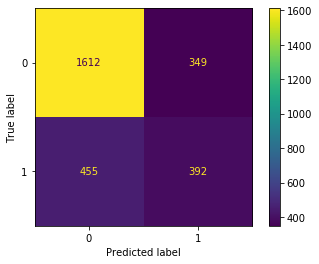

In [125]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt5, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt5, X_test, y_test, values_format='')
plt.show()

# Still slightly overfit
# Bette accuracy by .02
# Recall suffers by .04 - buut cross val is .53
# Slightly lower F1

### Try Random Forest

In [269]:
# X and y split of preprocessed 
X = preprocessed2.drop(columns=['Pos Rating'], axis=1)
y = preprocessed2['Pos Rating']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [271]:
X_train.shape

(7020, 75)

In [272]:
y_train.shape

(7020,)

In [273]:
# Instantiate
rf_grid = RandomForestClassifier(class_weight='balanced',
                             criterion = 'entropy',
                             max_depth = 10,
                             min_samples_leaf  = 20,
                             min_samples_split = 2)

# Fit
rf_grid.fit(X_train, y_train)

# Preds
train_preds = rf_grid.predict(X_train)
test_preds = rf_grid.predict(X_test)

Train Scores
------------
Accuracy: 0.6763532763532764
Recall: 0.5777777777777777
F1 Score: 0.5336617405582923
--------------------
Test Scores
-----------
Accuracy: 0.6735042735042736
Recall: 0.5696022727272727
Recall Mean Cross Val 3-Fold: 0.5626666666666668
F1 Score: 0.5121328224776501


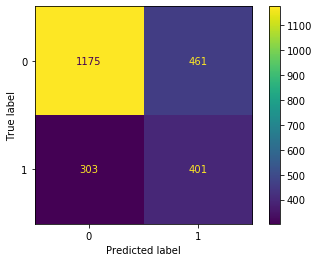

In [274]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(rf_grid, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(rf_grid, X_test, y_test, values_format='')
plt.show()

# Not overfit for once, but accuracy is less than random guess although recall is at highest
# F1 also at similar highest

In [ ]:
# source: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = pd.DataFrame(X_train.columns, importances)
    return importances_df

In [ ]:
importances_df = drop_col_feat_imp(rf_grid, X_train, y_train, random_state = 42)

In [ ]:
importances_df.sort_index(ascending=False)

In [256]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf_grid, X_train, y_train, r2)
perm_imp_rfpimp

,Importance
Feature,
Reviews,0.242698
Installs,0.191944
Type_Paid,0.066442
Type_Free,0.025839
Category_HEALTH_AND_FITNESS,0.018456
...,...
Content Rating_Everyone,-0.006460
Genres_Communication,-0.009228
Genres_Travel & Local,-0.009228


In [275]:
perm = PermutationImportance(rf_grid, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
rfg_perm_imp_eli5 = pd.DataFrame(X_train.columns, perm.feature_importances_)

In [276]:
rfg_perm_imp_eli5.sort_index(ascending=False)

,0
0.052664,Reviews
0.034630,Installs
0.007365,Genres_Health & Fitness
0.007091,Type_Free
0.006399,Category_HEALTH_AND_FITNESS
...,...
-0.000171,Genres_Photography
-0.000236,Genres_Dating
-0.000527,Category_DATING
-0.001048,Category_COMMUNICATION


### Additional Cleansing - Retry ordinal mapping for Content Rating

In [129]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [130]:
# Ordinal mapping
df['Content Rating'] = df['Content Rating'].map({'Everyone': 0, 'Everyone 10+': 1, 'Teen': 2,
                                                 'Mature 17+': 3, 'Adults only 18+': 4, 'Unrated': 5})

In [131]:
df['Content Rating'].value_counts()

0    7414
2    1084
3     461
1     397
4       3
5       1
Name: Content Rating, dtype: int64

### Create new df for modeling

In [132]:
# New breakdown of column types for varying treatments before modeling
# Numerical columns same - use num_cols2 and scaled2 variables

# Ordinal columns
ord_cols2 = ['Installs', 'Content Rating']

# Categorical columns for OHE
ohe_cols3 = ['Category', 'Type', 'Genres']

#### Ordinal Features

In [133]:
ord_features2 = df[ord_cols2]

#### Categorical Treatment (OHE)

In [134]:
ohe_features3 = df.copy()

In [135]:
ohe_features3 = ohe_features3[ohe_cols3]

In [136]:
ohe_features3 = pd.get_dummies(ohe_features3)

In [137]:
ohe_features3

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Genres_Racing,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Combine - Data Version 3 - Additionally Make Content Rating Ordinal

In [138]:
# Combine scaled numerical, OHE categoricals, and target into one df
preprocessed3 = pd.concat([scaled2, ord_features2, ohe_features3, y], axis=1)

In [139]:
preprocessed3.columns

Index(['Reviews', 'Size Trans', 'Installs', 'Content Rating',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
       'Genres_Action', 'Genres_A

### Retry Decision Tree since that best performed (even though overfit, can tune)

In [140]:
# X and y split of preprocessed 
X = preprocessed3.drop(columns=['Pos Rating'], axis=1)
y = preprocessed3['Pos Rating']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [142]:
# Instantiate
dt6 = DecisionTreeClassifier(class_weight='balanced')

# Fit
dt6.fit(X_train, y_train)

# Preds
train_preds = dt6.predict(X_train)
test_preds = dt6.predict(X_test)

Train Scores
------------
Accuracy: 0.9997150997150998
Recall: 1.0
F1 Score: 0.9995557529986673
--------------------
Test Scores
-----------
Accuracy: 0.7042735042735043
Recall: 0.5710227272727273
Recall Mean Cross Val 3-Fold: 0.5417777777777778
F1 Score: 0.5374331550802139


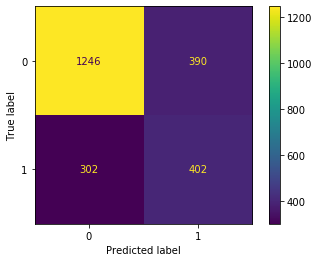

In [143]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt6, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt6, X_test, y_test, values_format='')
plt.show()

# Overfit, but can tune
# Similar accuracy to previous untuned decision trees
# Recall at 0.56, validation same at 0.53
# Slightly lower f1 0.53 from 0.55

In [144]:
# What is current depth of overfit tree
dt6.tree_.max_depth

58

In [145]:
coef = dt6.feature_importances_

In [146]:
d = dict(zip(X.columns, coef))

In [147]:
sorted_dict = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [148]:
sorted_dict
# Reviews, Size, and Installs are big drivers
# Then Content Rating

{'Reviews': 0.34629016221050357,
 'Size Trans': 0.2200908931774545,
 'Installs': 0.08966611297185345,
 'Content Rating': 0.037375638616756905,
 'Genres_Action': 0.011567170195236133,
 'Genres_Entertainment': 0.011415732111534016,
 'Genres_Casual': 0.011185009160069126,
 'Category_TRAVEL_AND_LOCAL': 0.01029218473181717,
 'Type_Free': 0.010270254391400543,
 'Category_LIFESTYLE': 0.00997005309876406,
 'Genres_Communication': 0.00968431865600683,
 'Genres_Education': 0.009249754618087335,
 'Category_GAME': 0.008177385676459141,
 'Genres_Health & Fitness': 0.007644197176893895,
 'Category_FAMILY': 0.0073228086787992305,
 'Genres_Personalization': 0.006690121416123045,
 'Genres_Finance': 0.00657448385095636,
 'Genres_Tools': 0.006355273022168148,
 'Genres_Puzzle': 0.006198194726605725,
 'Genres_Books & Reference': 0.006124422002447481,
 'Genres_Medical': 0.006098111959077518,
 'Category_PERSONALIZATION': 0.006086603254473068,
 'Genres_Sports': 0.006023018073630831,
 'Genres_Food & Drink': 0.

### Try Decision Tree with half max depth

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [150]:
# Instantiate
dt7 = DecisionTreeClassifier(class_weight='balanced',
                            max_depth = 24)

# Fit
dt7.fit(X_train, y_train)

# Preds
train_preds = dt7.predict(X_train)
test_preds = dt7.predict(X_test)

Train Scores
------------
Accuracy: 0.95
Recall: 0.9333333333333333
F1 Score: 0.922874093605801
--------------------
Test Scores
-----------
Accuracy: 0.7034188034188035
Recall: 0.5724431818181818
Recall Mean Cross Val 3-Fold: 0.5462222222222223
F1 Score: 0.5373333333333333


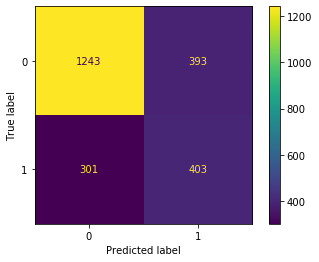

In [151]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt7, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt7, X_test, y_test, values_format='')
plt.show()

# Still vey over fit - focus on trying smalle numbers for max depth
# Accuracy, Recall and F1 hold

#### Grid Search2 - With Similar Ranges

In [152]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30, 35],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

In [153]:
# grid = GridSearchCV(dt6,
#                    param_grid = param_dict,
#                    cv=5,
#                    verbose=1)

# grid.fit(X_train, y_train)

In [154]:
# grid.best_params_

In [155]:
# grid.best_score_
# # 1% better than random guess

#### Apply GridSearch2 results to Decision Tree

In [156]:
# Instantiate
dt_grid2 = DecisionTreeClassifier(class_weight='balanced',
                             criterion = 'entropy',
                             max_depth = 10,
                             min_samples_leaf  = 20,
                             min_samples_split = 2)

# Fit
dt_grid2.fit(X_train, y_train)

# Preds
train_preds = dt_grid2.predict(X_train)
test_preds = dt_grid2.predict(X_test)

Train Scores
------------
Accuracy: 0.7215099715099715
Recall: 0.5542222222222222
F1 Score: 0.5605754102045403
--------------------
Test Scores
-----------
Accuracy: 0.6897435897435897
Recall: 0.4971590909090909
Recall Mean Cross Val 3-Fold: 0.5315555555555557
F1 Score: 0.4908835904628331


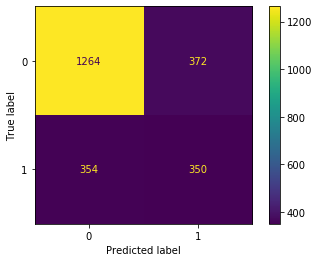

In [157]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt_grid2, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt_grid2, X_test, y_test, values_format='')
plt.show()

# Much less overfit - but accuracy down .2 - Same as random guess
# Recall much lower from 0.58 to 0.49 - but validation at 0.53

In [158]:
coef = dt_grid2.feature_importances_

In [159]:
d = dict(zip(X.columns, coef))

In [160]:
sorted_dict = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [161]:
sorted_dict
# Reviews, Size, and Installs are big drivers
# Then Content Rating

{'Reviews': 0.3554157380392292,
 'Installs': 0.2877308399569165,
 'Size Trans': 0.11013454517876195,
 'Type_Free': 0.05472163026244945,
 'Genres_Health & Fitness': 0.04136688785932196,
 'Category_TRAVEL_AND_LOCAL': 0.02511964877854719,
 'Category_TOOLS': 0.01803599469452513,
 'Content Rating': 0.01741160871821377,
 'Genres_Education': 0.010817548183713893,
 'Genres_Social': 0.010240877815036341,
 'Category_COMMUNICATION': 0.009507867267359504,
 'Genres_Action': 0.008882868592384347,
 'Category_LIFESTYLE': 0.008248828356214486,
 'Type_Paid': 0.007384600062036861,
 'Category_MAPS_AND_NAVIGATION': 0.006801687871411037,
 'Category_BOOKS_AND_REFERENCE': 0.006487510662998553,
 'Category_GAME': 0.005527897572028405,
 'Genres_Entertainment': 0.005397716691970863,
 'Category_MEDICAL': 0.004721739968658764,
 'Genres_Tools': 0.003008757867974191,
 'Category_FAMILY': 0.001892482480236812,
 'Category_BUSINESS': 0.0011427231200109096,
 'Category_ART_AND_DESIGN': 0.0,
 'Category_AUTO_AND_VEHICLES': 0

## Correlation checks and Data Version 4 - Remove genres from highly correlated category and genre correlations

In [162]:
def correlation_view(df, annot):
    """Evaluates correlations between all Dataframe columns/variables and displays correlation heatmap 
    (lower triangle only) with or without correlation value annotation
    --
    Inputs:
    - df - Panda DataFrame
    - annot - Options are True or False. If value is True, each cell in correlation heatmap grid will have 
    correlation value noted in the cell along with t. If value is False, the cell will be blank and only colored by
    color in relation to gradient scale
    --
    Outputs:
    - Correlation heatmap lower triangle with cool(blue) to hot (red) correlation gradient. Upper triangle is masked.
    """
    # From Seaborn documentation - https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 20))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annot)

In [163]:
def high_corr(df, thresh):
    """Evaluates correlations between all Dataframe columns/variables and displays DataFrame of variable correlations 
    above the threshold defined
    --
    Inputs:
    - df - Pandas DataFrame
    - thresh - correlation threshold or limit willing to be accepted; if thresh=0.8, output will show all variables
    correlations that are higher than 0.8
    Outputs:
    - Pandas DataFrame of variable correlations above the threshold defined
    """
    # Define correlation threshold
    corr_val=thresh
    # Create DataFrame of feature 1, feature 2, and their correlation value; reset the index
    df2 = df.corr().unstack().reset_index()
    # Filter DataFrame to only show rows with correlation values above the defined threshold
    high_corr = df2[(df2[0]>corr_val)& (df2[0]<1)]
    # Show DataFrame of correlated values above threshold
    return high_corr

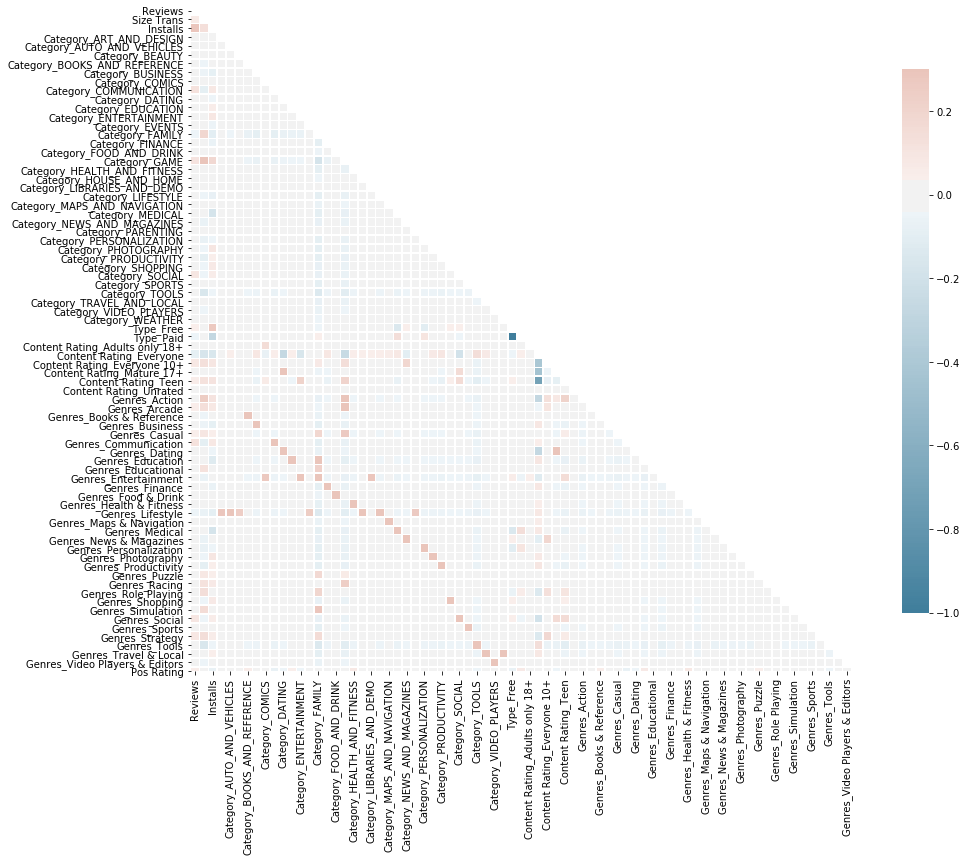

In [164]:
correlation_view(preprocessed2, False)
# Some Genres and Categories are correlated

In [165]:
high_corr(preprocessed2, 0.7)

,level_0,level_1,0
502,Category_BOOKS_AND_REFERENCE,Genres_Books & Reference,0.994321
733,Category_COMMUNICATION,Genres_Communication,0.998424
1424,Category_HEALTH_AND_FITNESS,Genres_Health & Fitness,0.996540
2426,Category_SPORTS,Genres_Sports,0.971958
2581,Category_TRAVEL_AND_LOCAL,Genres_Travel & Local,0.862940
2658,Category_VIDEO_PLAYERS,Genres_Video Players & Editors,0.990593
3502,Genres_Books & Reference,Category_BOOKS_AND_REFERENCE,0.994321
3733,Genres_Communication,Category_COMMUNICATION,0.998424
4274,Genres_Health & Fitness,Category_HEALTH_AND_FITNESS,0.996540
5351,Genres_Sports,Category_SPORTS,0.971958


In [166]:
high_corr(preprocessed3, 0.7)

,level_0,level_1,0
538,Category_BOOKS_AND_REFERENCE,Genres_Books & Reference,0.994321
754,Category_COMMUNICATION,Genres_Communication,0.998424
1400,Category_HEALTH_AND_FITNESS,Genres_Health & Fitness,0.996540
2337,Category_SPORTS,Genres_Sports,0.971958
2482,Category_TRAVEL_AND_LOCAL,Genres_Travel & Local,0.862940
2554,Category_VIDEO_PLAYERS,Genres_Video Players & Editors,0.990593
2918,Genres_Books & Reference,Category_BOOKS_AND_REFERENCE,0.994321
3134,Genres_Communication,Category_COMMUNICATION,0.998424
3640,Genres_Health & Fitness,Category_HEALTH_AND_FITNESS,0.996540
4647,Genres_Sports,Category_SPORTS,0.971958


In [167]:
df['Genres'].describe()

count      9360
unique       31
top       Tools
freq        733
Name: Genres, dtype: object

In [168]:
df['Category'].describe()

count       9360
unique        33
top       FAMILY
freq        1746
Name: Category, dtype: object

In [169]:
# Genre has been of less importance in DTs at least - use Category
preprocessed4 = preprocessed2.drop(columns=['Genres_Books & Reference', 'Genres_Communication', 'Genres_Health & Fitness',
                           'Genres_Sports', 'Genres_Travel & Local', 'Genres_Video Players & Editors'])

#### Apply GridSearch2 results to Decision Tree

In [170]:
# X and y split of preprocessed 
X = preprocessed4.drop(columns=['Pos Rating'], axis=1)
y = preprocessed4['Pos Rating']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [172]:
# Instantiate
dt_grid3 = DecisionTreeClassifier(class_weight='balanced',
                             criterion = 'entropy',
                             max_depth = 10,
                             min_samples_leaf  = 20,
                             min_samples_split = 2)

# Fit
dt_grid3.fit(X_train, y_train)

# Preds
train_preds = dt_grid3.predict(X_train)
test_preds = dt_grid3.predict(X_test)

Train Scores
------------
Accuracy: 0.7215099715099715
Recall: 0.5537777777777778
F1 Score: 0.5603777827749045
--------------------
Test Scores
-----------
Accuracy: 0.6863247863247863
Recall: 0.4928977272727273
Recall Mean Cross Val 3-Fold: 0.52
F1 Score: 0.48599439775910364


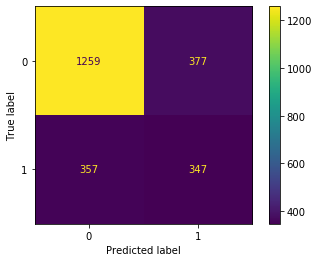

In [173]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(dt_grid3, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(dt_grid3, X_test, y_test, values_format='')
plt.show()

# Much less overfit - but accuracy down .2 - Same as random guess
# Recall much lower from 0.58 to 0.49 - but validation at 0.53

In [174]:
coef = dt_grid2.feature_importances_

In [175]:
d = dict(zip(X.columns, coef))

In [176]:
sorted_dict = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [177]:
sorted_dict
# Reviews, Size, and Installs are big drivers
# Then Content Rating

{'Reviews': 0.3554157380392292,
 'Installs': 0.2877308399569165,
 'Size Trans': 0.11013454517876195,
 'Type_Paid': 0.05472163026244945,
 'Genres_Entertainment': 0.04136688785932196,
 'Category_VIDEO_PLAYERS': 0.02511964877854719,
 'Category_TRAVEL_AND_LOCAL': 0.01803599469452513,
 'Category_ART_AND_DESIGN': 0.01741160871821377,
 'Genres_Business': 0.010817548183713893,
 'Genres_Shopping': 0.010240877815036341,
 'Category_DATING': 0.009507867267359504,
 'Content Rating_Everyone': 0.008882868592384347,
 'Category_MAPS_AND_NAVIGATION': 0.008248828356214486,
 'Content Rating_Adults only 18+': 0.007384600062036861,
 'Category_MEDICAL': 0.006801687871411037,
 'Category_BUSINESS': 0.006487510662998553,
 'Category_HEALTH_AND_FITNESS': 0.005527897572028405,
 'Genres_Dating': 0.005397716691970863,
 'Category_NEWS_AND_MAGAZINES': 0.004721739968658764,
 'Genres_Strategy': 0.003008757867974191,
 'Category_FINANCE': 0.001892482480236812,
 'Category_COMICS': 0.0011427231200109096,
 'Category_AUTO_AND

## Random Forest

In [263]:
# Instantiate
rf_grid2 = RandomForestClassifier(class_weight='balanced',
                             criterion = 'entropy',
                             max_depth = 10,
                             min_samples_leaf  = 20,
                             min_samples_split = 2)

# Fit
rf_grid2.fit(X_train, y_train)

# Preds
train_preds = rf_grid2.predict(X_train)
test_preds = rf_grid2.predict(X_test)

Train Scores
------------
Accuracy: 0.6745014245014245
Recall: 0.5786666666666667
F1 Score: 0.5326242585395786
--------------------
Test Scores
-----------
Accuracy: 0.6717948717948717
Recall: 0.5653409090909091
Recall Mean Cross Val 3-Fold: 0.5666666666666667
F1 Score: 0.5089514066496164


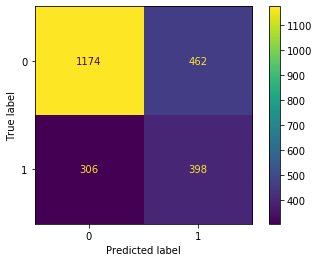

In [264]:
# print scores
print("Train Scores")
print("------------")
print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Recall: {recall_score(y_train, train_preds)}")
print(f"F1 Score: {f1_score(y_train, train_preds)}")
print("----" * 5)
print("Test Scores")
print("-----------")
print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Recall: {recall_score(y_test, test_preds)}")
print(f"Recall Mean Cross Val 3-Fold: {np.mean(cross_val_score(rf_grid2, X_train, y_train, cv=3, scoring='recall'))}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

# plot test confusion matrix
plot_confusion_matrix(rf_grid2, X_test, y_test, values_format='')
plt.show()

# Not overfit for once, but accuracy is less than random guess although recall is at highest
# F1 also at similar highest

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [266]:
perm = PermutationImportance(rf_grid2, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
perm_imp_eli5 = pd.DataFrame(X_train.columns, perm.feature_importances_)

In [268]:
perm_imp_eli5.sort_index(ascending=False)

,0
0.060459,Reviews
0.038481,Installs
0.010225,Type_Paid
0.009775,Type_Free
0.005547,Category_HEALTH_AND_FITNESS
...,...
-0.000547,Genres_Business
-0.000650,Category_PHOTOGRAPHY
-0.000943,Genres_Communication
-0.001026,Content Rating_Everyone


In [259]:
perm_imp_rfpimp = permutation_importances(rf_grid2, X_train, y_train, r2)
perm_imp_rfpimp

# Note rf_grid results
# Reviews	0.242698
# Installs	0.191944
# Type_Paid	0.066442
# Type_Free	0.025839

,Importance
Feature,
Reviews,0.212326
Installs,0.166957
Type_Free,0.048091
Type_Paid,0.041739
Genres_Books & Reference,0.032666
...,...
Category_GAME,-0.002722
Genres_Video Players & Editors,-0.002722
Category_PERSONALIZATION,-0.004537


## Revisit Top Performing Model for Feature Importance


RF GridSearch - slightly underfit (Data Version 2)
    - rf_grid
    - acc - 0.67
    - rec - 0.59
    - rec cv - 0.56
    - F1 - 0.52
    
RF GridSearch2 - overfit 0.03 (Data Version 4)
    - rf_grid2 
    - acc - 0.66
    - rec - 0.58
    - rev cv 0.55
    - F1 - 0.51
    
DT GridSearch - overfit 0.03 (Data Version 2)
    - dt_grid
    - acc - 0.69
    - rec - 0.5
    - rec cv - 0.53
    - F1 - 0.49
    
DT GridSearch2 - overfit 0.03 (Data Version 3)
    - dt_grid2
    - acc - 0.69
    - rec - 0.5
    - rec cv - 0.53
    - F1 - 0.49

### Note: In Random Forect Feature Importance investigation below - Installs are only consistent top feature.

The RF models tested resulted in accuracy slightly less than a random guess (.66/.67), the highest recall of all models (.58/.59), and cross validated that recall (0.55/0.56)

In [190]:
feats = rf_grid.feature_importances_
d = dict(zip(X.columns, feats))
sorted_feature_imps = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True)[:10])
sorted_feature_imps

{'Reviews': 0.2502003593439037,
 'Installs': 0.2421862223244038,
 'Size Trans': 0.06738953565766201,
 'Genres_Medical': 0.040914585201578965,
 'Category_HEALTH_AND_FITNESS': 0.04011215622772259,
 'Type_Paid': 0.03179617340426175,
 'Type_Free': 0.027065851425210043,
 'Genres_Entertainment': 0.021212064039538195,
 'Genres_Education': 0.02108685481205847,
 'Category_TOOLS': 0.020887378659973647}

In [215]:
# source: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = pd.DataFrame(X_train.columns, importances)
    return importances_df

In [222]:
importances_df = drop_col_feat_imp(rf_grid, X_train, y_train, random_state = 42)

In [224]:
importances_df.sort_index(ascending=False)

,0
0.028775,Installs
0.007835,Genres_Dating
0.007835,Category_MAPS_AND_NAVIGATION
0.007550,Content Rating_Teen
0.007407,Category_NEWS_AND_MAGAZINES
...,...
0.002707,Category_BUSINESS
0.002279,Category_EDUCATION
0.002279,Category_AUTO_AND_VEHICLES
0.002137,Size Trans


In [232]:
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(rf_grid, cv = "prefit", refit = False, n_iter = 50, random_state=42)
# perm_imp_eli5 = pd.DataFrame(X_train.columns, perm.feature_importances_)

In [235]:
feats2 = rf_grid2.feature_importances_
d2 = dict(zip(X.columns, feats2))
sorted_feature_imps2 = dict( sorted(d2.items(), key=operator.itemgetter(1),reverse=True)[:10])
sorted_feature_imps2

{'Reviews': 0.2655458374019868,
 'Installs': 0.22994472259998858,
 'Size Trans': 0.07792682696012941,
 'Category_HEALTH_AND_FITNESS': 0.05773581361829353,
 'Category_COMMUNICATION': 0.03786033723251374,
 'Type_Paid': 0.031316636869285236,
 'Category_TOOLS': 0.02780308883264951,
 'Genres_Simulation': 0.027782908050056614,
 'Type_Free': 0.024800260881087704,
 'Genres_Communication': 0.020342200011184055}

In [236]:
importances_df2 = drop_col_feat_imp(rf_grid2, X_train, y_train, random_state = 42)

In [237]:
importances_df2.sort_index(ascending=False)

,0
0.028775,Installs
0.007835,Genres_Dating
0.007835,Category_MAPS_AND_NAVIGATION
0.007550,Content Rating_Teen
0.007407,Category_NEWS_AND_MAGAZINES
...,...
0.002707,Category_BUSINESS
0.002279,Category_EDUCATION
0.002279,Category_AUTO_AND_VEHICLES
0.002137,Size Trans


### Note: In Decision Tree Feature Importance investigation below - Reviews, Installs, and Size of App are consistent top 3 features.

The DT models tested resulted in accuracy about equal to a random guess (.69), the lowest recall (.5), but mid range of all the models on cross validating that recall (0.53)

In [238]:
feats3 = dt_grid.feature_importances_
d3 = dict(zip(X.columns, feats3))
sorted_feature_imps3 = dict( sorted(d3.items(), key=operator.itemgetter(1),reverse=True)[:10])
sorted_feature_imps3

{'Reviews': 0.35377055939426005,
 'Installs': 0.28773083995693227,
 'Size Trans': 0.11177972382370507,
 'Type_Free': 0.06210623032449733,
 'Genres_Health & Fitness': 0.041366887859316616,
 'Category_TRAVEL_AND_LOCAL': 0.02511964877855545,
 'Genres_Tools': 0.018035994694523463,
 'Content Rating_Mature 17+': 0.012834447740698807,
 'Genres_Education': 0.010817548183715288,
 'Category_SOCIAL': 0.010240877815036348}

In [239]:
importances_df3 = drop_col_feat_imp(dt_grid, X_train, y_train, random_state = 42)

In [240]:
importances_df3.sort_index(ascending=False)

,0
0.060399,Reviews
0.052849,Installs
0.044017,Size Trans
0.002564,Genres_Action
0.001852,Genres_Education
...,...
0.000000,Category_NEWS_AND_MAGAZINES
0.000000,Category_MEDICAL
-0.002137,Category_GAME
-0.002279,Content Rating_Mature 17+


In [241]:
feats4 = dt_grid2.feature_importances_
d4 = dict(zip(X.columns, feats4))
sorted_feature_imps4 = dict( sorted(d4.items(), key=operator.itemgetter(1),reverse=True)[:10])
sorted_feature_imps4

{'Reviews': 0.3554157380392292,
 'Installs': 0.2877308399569165,
 'Size Trans': 0.11013454517876195,
 'Type_Paid': 0.05472163026244945,
 'Genres_Education': 0.04136688785932196,
 'Category_VIDEO_PLAYERS': 0.02511964877854719,
 'Category_TRAVEL_AND_LOCAL': 0.01803599469452513,
 'Category_ART_AND_DESIGN': 0.01741160871821377,
 'Genres_Books & Reference': 0.010817548183713893,
 'Genres_Puzzle': 0.010240877815036341}

In [242]:
importances_df4 = drop_col_feat_imp(dt_grid2, X_train, y_train, random_state = 42)

In [243]:
importances_df4.sort_index(ascending=False)

,0
0.060399,Reviews
0.052849,Installs
0.044017,Size Trans
0.002564,Genres_Action
0.001852,Genres_Education
...,...
0.000000,Category_NEWS_AND_MAGAZINES
0.000000,Category_MEDICAL
-0.002137,Category_GAME
-0.002279,Content Rating_Mature 17+
